## LAB02

**Anand Kumar Dubey  3MSCDSA**

**Lab Introduction:**

In today's lab session, we'll explore the powerful K-means clustering algorithm. K-means is an unsupervised machine learning technique used to group similar data points into clusters. Its primary objective is to partition a dataset into K distinct, non-overlapping clusters. Each observation is assigned to the cluster with the nearest mean, also known as the centroid, which acts as a prototype for that cluster.

K-means operates iteratively, dividing an unlabeled dataset into K different clusters while ensuring that each data point belongs to only one group with similar properties. This algorithm is particularly valuable for uncovering natural groupings within data without relying on prior training or labeled examples.



**Choosing the Optimal K:**

Selecting the right value for K is essential for effective clustering. Techniques like the elbow method can aid in this task. The elbow method involves plotting the sum of squared distances (variance) from each data point to its assigned centroid for different values of K. The "elbow" point on the plot indicates the optimal K, beyond which adding more clusters doesn’t significantly reduce variance.

**Lab Exercise:**

Perform KMeans Clustering on the provided dataset.
Vary the value of 'k' from 2 to 5, and conduct Cluster Analysis on each predicted cluster.
Explore the features of the predicted clusters to identify their properties.
Illustrate the usage of the Elbow Method to determine the Optimal Number of Clusters.
Additional Exploration:



In [216]:
#Importing required modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA   
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

 

In [217]:
## Loading data fro the clustering 

data=pd.read_csv("housing.csv")
data_numeric = data.drop(columns=["ocean_proximity"])


In [218]:
# Cleaning data
print(data_numeric.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


In [219]:
data_numeric["total_bedrooms"]=data_numeric["total_bedrooms"].fillna(data_numeric["total_bedrooms"].median())

In [220]:
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data_numeric)

In [221]:
data=df

In [222]:
df.shape

(20640, 2)

In [223]:

# Perform KMeans Clustering
def perform_kmeans(data, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    return kmeans.labels_


Cluster Analysis for k=2:
Cluster 1:
-28580.896252152303
Cluster 2:
80078.1014720001


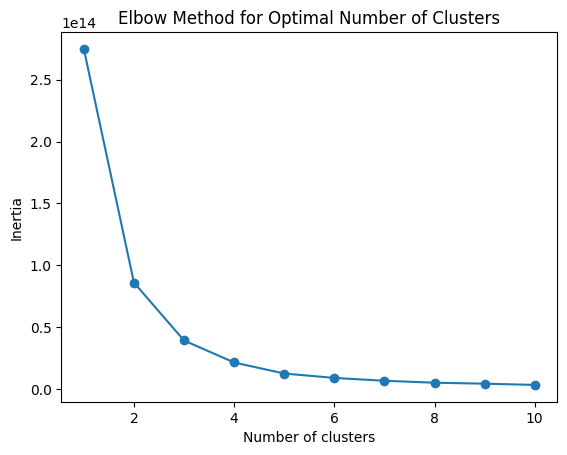


Cluster Analysis for k=3:
Cluster 1:
-44544.19215583324
Cluster 2:
108945.48485627856
Cluster 3:
15907.875828861856


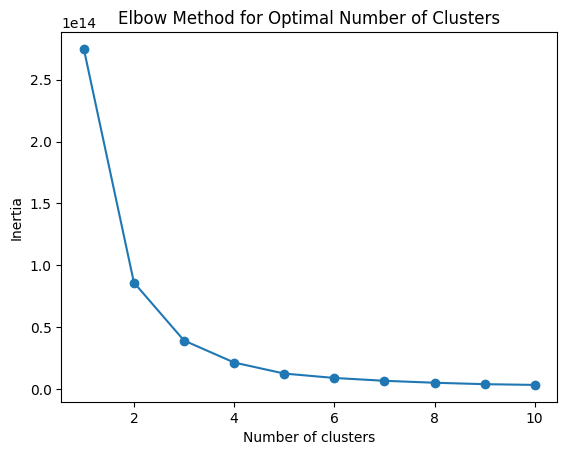


Cluster Analysis for k=4:
Cluster 1:
48308.44759450448
Cluster 2:
-53653.897840291924
Cluster 3:
129337.44264095451
Cluster 4:
-8051.383874673127


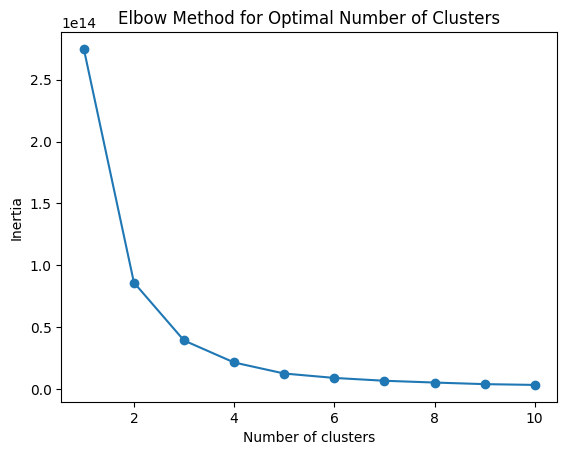


Cluster Analysis for k=5:
Cluster 1:
-58637.0711821554
Cluster 2:
136452.9478042733
Cluster 3:
18795.67509717515
Cluster 4:
-21372.03536959098
Cluster 5:
69451.02054184959


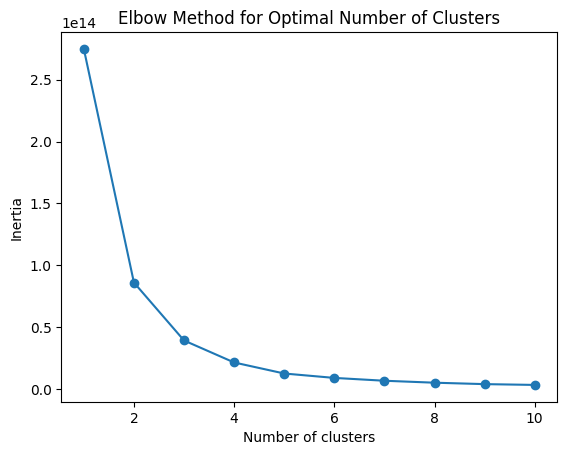

In [224]:

# Changing the value of k from 2 to 5
for k in range(2, 6):
    # Performing KMeans Clustering
    labels = perform_kmeans(data_numeric, k)
    
    # Displaying cluster analysis
    print(f"\nCluster Analysis for k={k}:")
    for cluster_num in range(k):
        cluster_data = data[labels == cluster_num]
        cluster_mean = cluster_data.mean()
        print(f"Cluster {cluster_num+1}:")
        print(cluster_mean)
    
    # Ploting the Elbow Method to find the Optimal Number of Clusters
    inertias = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data_numeric)
        inertias.append(kmeans.inertia_)
    
    plt.plot(range(1, 11), inertias, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

Plotting

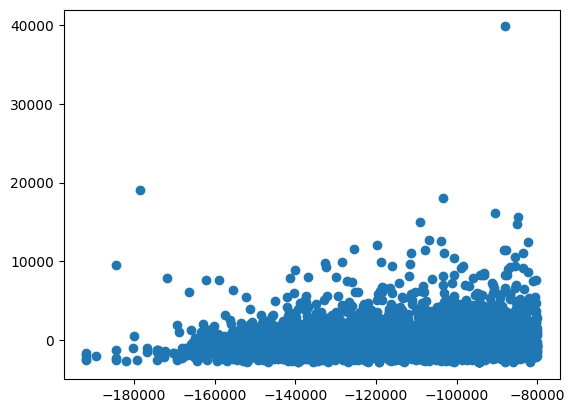

In [226]:
#filtering rows of original data
filtered_label0 = df[labels == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

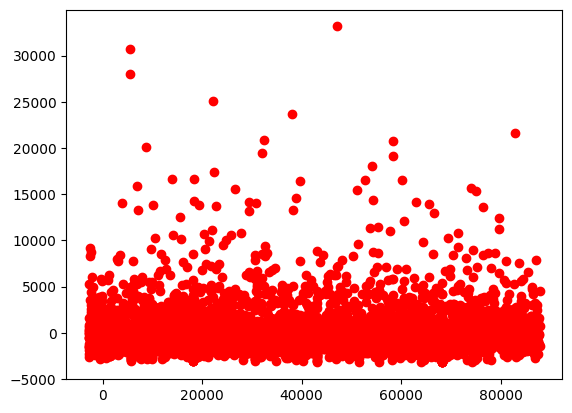

In [227]:
#filtering rows of original data
filtered_label2 = df[labels == 2]
 
filtered_label8 = df[labels == 8]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

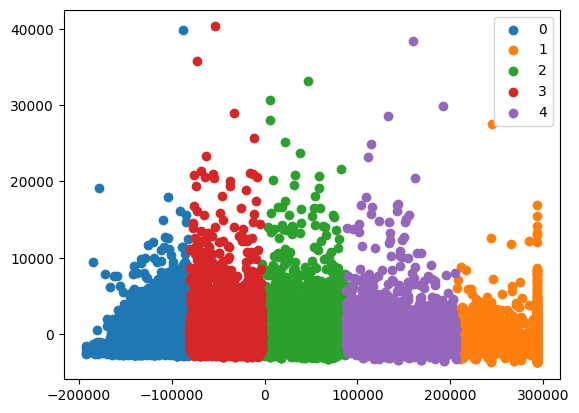

In [228]:

#Getting unique labels
 
u_labels = np.unique(labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[labels == i , 0] , df[labels == i , 1] , label = i)
plt.legend()
plt.show()